In [1]:
### FINAL PROJECT
### XGBOOST CLASSIFICATION

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
import seaborn as sns
from collections import Counter
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import time
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from eli5.sklearn import PermutationImportance
import shap
from sklearn.model_selection import GridSearchCV

In [6]:
KOI_data = pd.read_csv("KOIdata.csv", skiprows=31)

In [7]:
variables = ['koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 
             'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 
             'koi_model_snr', 'koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag', 
             'koi_pdisposition']

features = ['koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 
             'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 
             'koi_model_snr', 'koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag']

In [8]:
KOI_data = KOI_data[variables]
KOI_data = KOI_data.dropna()
X = KOI_data[features]
y = KOI_data['koi_pdisposition']

In [9]:
y = pd.DataFrame(y)

In [10]:
Counter(y['koi_pdisposition'])

Counter({'CANDIDATE': 4612, 'FALSE POSITIVE': 4588})

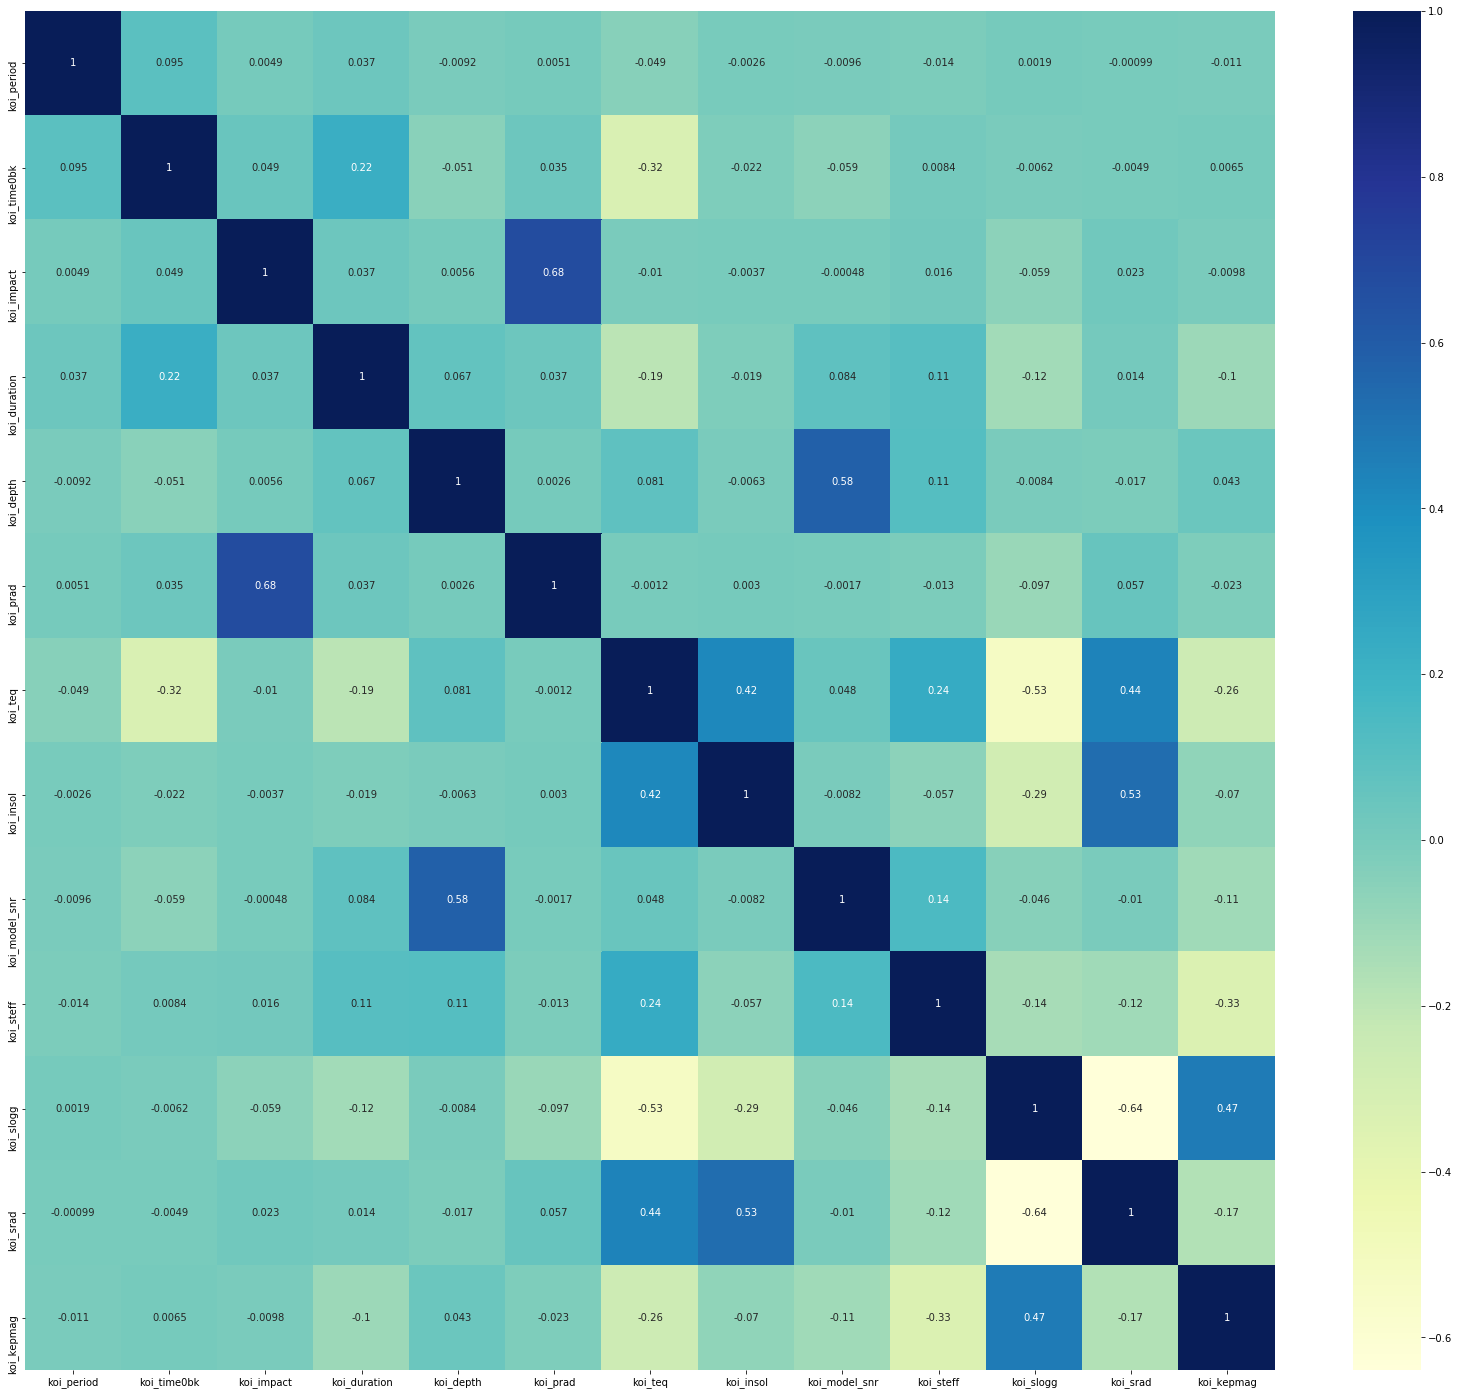

In [11]:
# Make and show the correlation matrix of the new reduced dataset
X_corrmat = X.corr()
fig1, ax1 = plt.subplots(figsize=(28,25))
ax1 = sns.heatmap(X_corrmat, annot=True, cmap="YlGnBu")

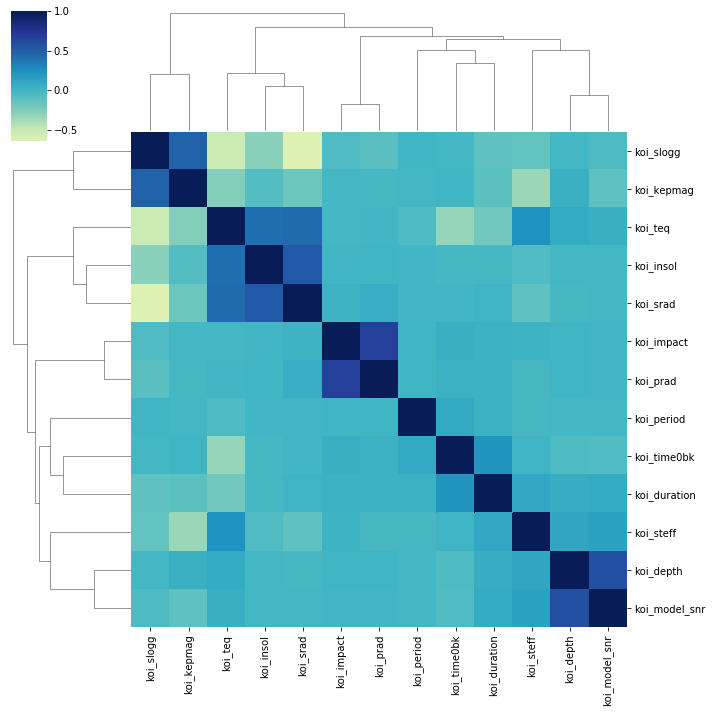

In [12]:
sns.clustermap(X.corr(), center=0, cmap="YlGnBu")

/opt/conda/envs/python3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


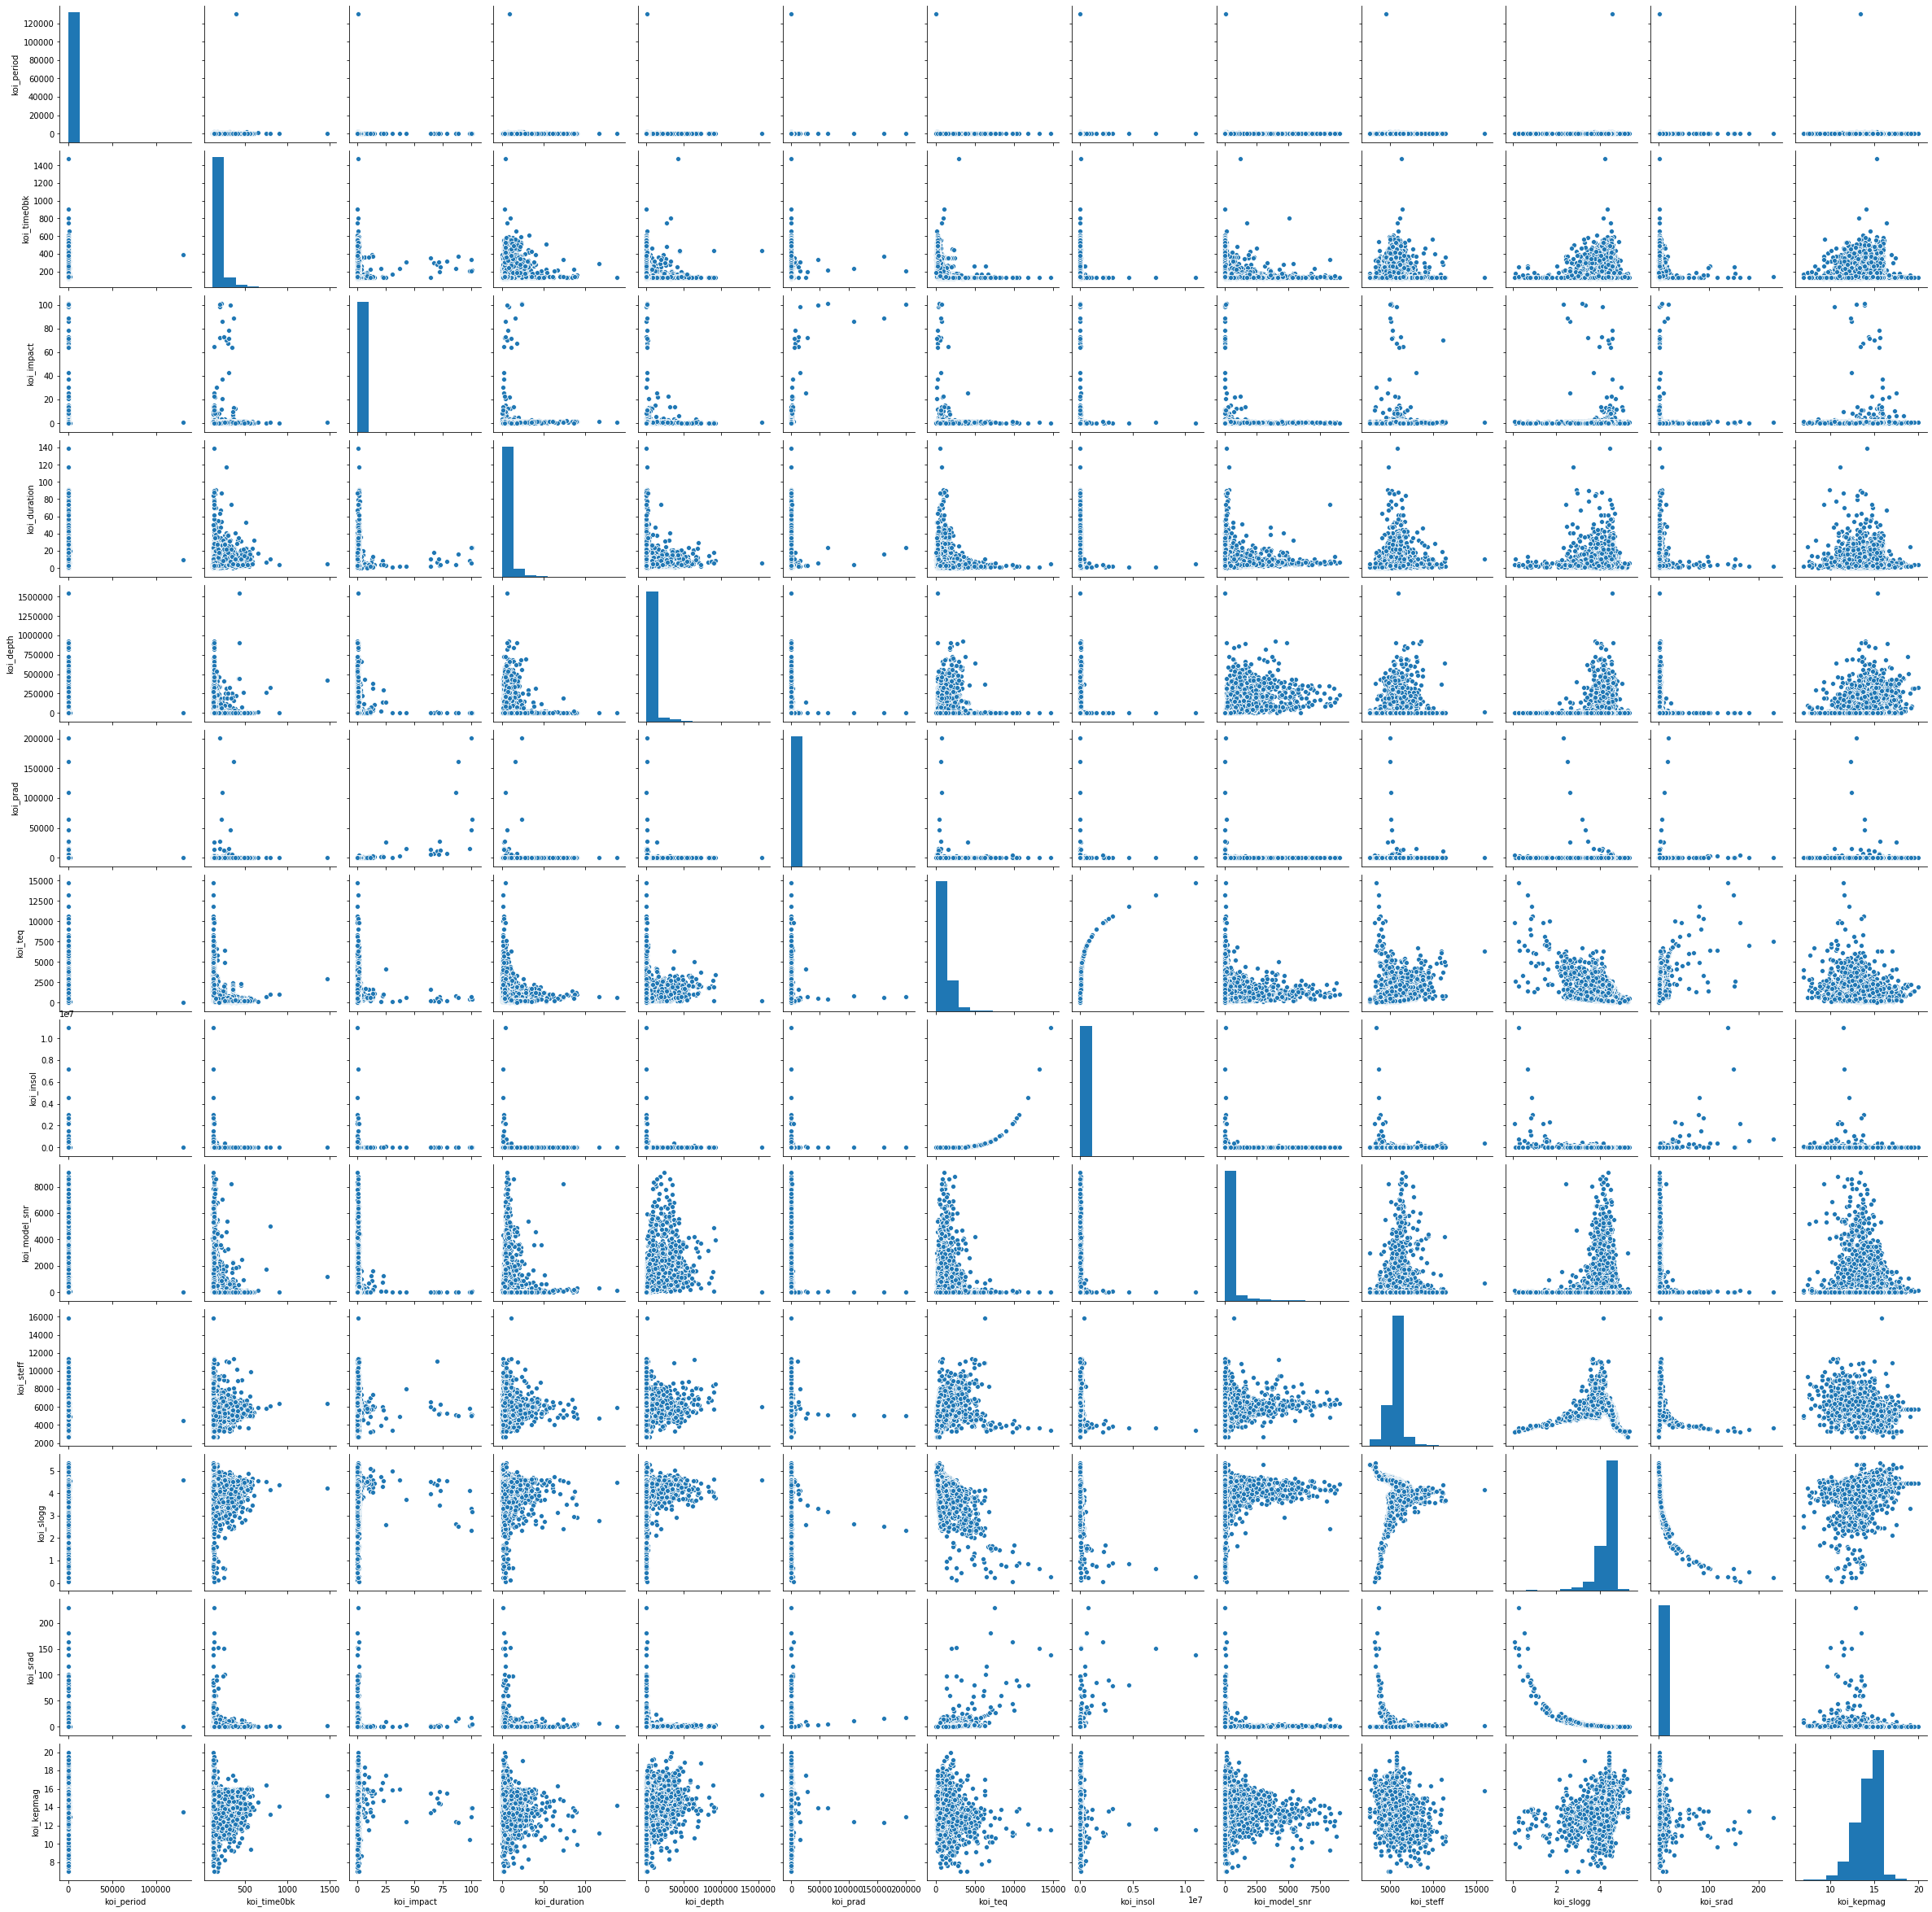

In [39]:
sns.pairplot(X, size = 2.5)
plt.show();

In [13]:
yint = y.to_numpy()
for i in range(len(yint)):
    if yint[i] == 'CANDIDATE':
        yint[i] = 0
    else:
        yint[i] = 1

In [14]:
yint = pd.DataFrame(yint)
yint.columns = ['koi_pdisposition']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, yint, test_size=0.2, random_state=124, shuffle=True)

In [28]:
X_train

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,koi_kepmag
7673,16.832080,133.174695,0.2180,7.79748,48375.0,61.35,1243.0,565.17,5156.6,6300.0,3.646,2.755,13.125
835,2.243017,133.450860,0.7370,2.72100,299.6,1.37,1167.0,438.46,59.1,5462.0,4.614,0.732,13.980
8342,1.835922,132.077813,1.1890,5.99420,30746.0,46.30,1501.0,1195.13,1378.9,5930.0,4.472,0.976,13.134
3033,34.259514,183.237180,0.0080,4.77430,1072.5,2.41,468.0,11.36,66.1,5409.0,4.609,0.746,14.701
9524,18.384953,133.390000,0.0120,5.92000,92.9,1.36,872.0,136.82,6.0,6335.0,4.214,1.401,11.871
...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,20.834150,186.039210,0.2690,4.52200,803.1,2.26,563.0,23.82,26.2,5296.0,4.538,0.808,15.956
9518,1.332555,132.048000,0.4620,3.63000,66.6,0.92,1850.0,2765.99,10.1,6310.0,4.417,1.095,15.270
8652,8.292756,135.035200,0.6346,4.78400,103.3,1.01,927.0,174.36,8.4,6146.0,4.497,0.943,15.382
4814,3.514137,132.407070,0.9353,3.91900,32.7,0.69,1267.0,609.04,11.2,6201.0,4.472,0.989,13.474


In [16]:
xgboost = XGBClassifier(n_estimators=200)

In [17]:
# Do the training on my train dataset, also measuring the time taken
print('--------- TRAINING ---------')
start_time = time.time()
xgboost.fit(X_train,y_train.values.ravel())
elapsed = time.time() - start_time
print('----------TRAINING DONE -----') 
print(f"Training time for {len(features)} variables and {len(X_train)} events: {elapsed:6.3f}s")

--------- TRAINING ---------
----------TRAINING DONE -----
Training time for 13 variables and 7360 events:  1.211s


In [18]:
predictions = xgboost.predict_proba(X_test)

In [19]:
y_score = predictions[:,1]
y_pred = np.around(y_score) # Round the values to 0 or 1

In [20]:
y_score = pd.DataFrame(y_score)
y_score.columns = ['koi_pdisposition']

In [21]:
y_test

,koi_pdisposition
3858,1
3350,0
2064,0
8506,1
2502,0
...,...
8036,1
9017,1
2262,0
5401,1


In [22]:
y_score

,koi_pdisposition
0,0.984979
1,0.123597
2,0.015426
3,0.977253
4,0.022475
...,...
1835,0.999917
1836,0.008550
1837,0.009219
1838,0.962588


In [23]:
y_t = y_test.to_numpy().astype('float32')
y_t

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [24]:
print(confusion_matrix(y_t,y_pred))
print(classification_report(y_t,y_pred))

[[759 128]
 [164 789]]
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       887
         1.0       0.86      0.83      0.84       953

    accuracy                           0.84      1840
   macro avg       0.84      0.84      0.84      1840
weighted avg       0.84      0.84      0.84      1840



Text(0, 0.5, 'True Positive Rate')

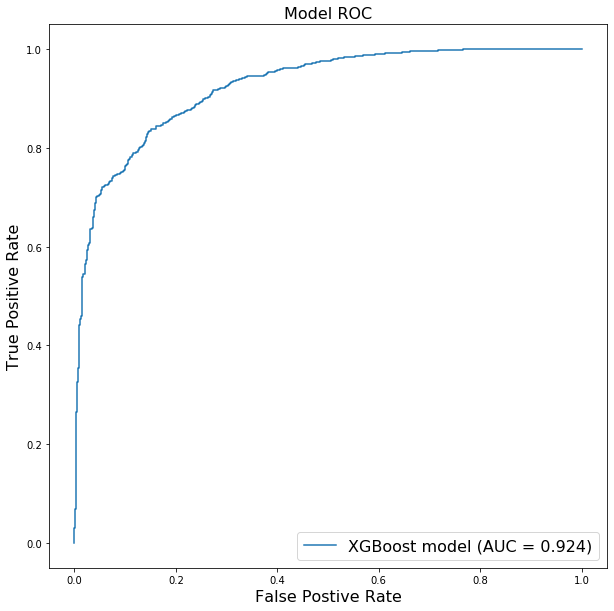

In [25]:
# Evaluate the result with the ROC curve and AUC:
fpr, tpr, _ = roc_curve(y_t, y_score)

# Compute the AUC score from the FP and TP rates
auc_score = auc(fpr,tpr)

# Plot the ROC curve for these results:
fig1 = plt.figure(figsize = [10,10])
plt.title('Model ROC', size = 16)
plt.plot(fpr, tpr, label=f'XGBoost model (AUC = {auc_score:5.3f})')
plt.legend(fontsize=16)
plt.xlabel('False Postive Rate', size=16)
plt.ylabel('True Positive Rate', size=16)

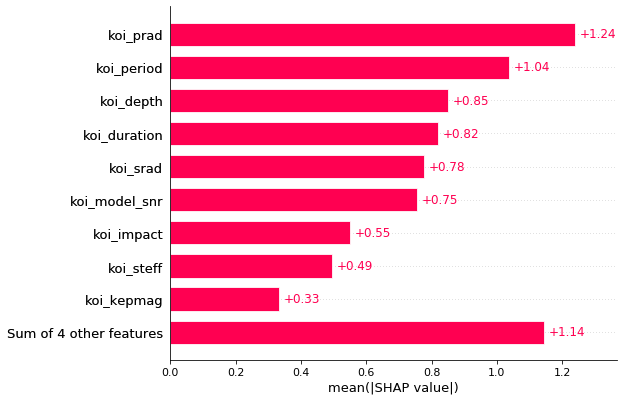

In [43]:
## Use the SHAP ranking to extract the important variables

shap.initjs()
explainer = shap.TreeExplainer(xgboost)

# Compute the shap values only on the first 1000 rows of the dataset
shap_values = explainer(X_train)
shap.plots.bar(shap_values)

In [46]:
top_features = ['koi_period', 'koi_impact', 'koi_duration', 
             'koi_depth', 'koi_prad', 
             'koi_model_snr', 'koi_steff', 'koi_srad', 'koi_kepmag']

In [38]:
# Apply the permutation method to extract the most important features
#perm = PermutationImportance(xgboost, random_state=1).fit(X_train, y_train.values.ravel())
#eli5.show_weights(perm, feature_names = X_train.columns.tolist())

In [48]:
X_top = KOI_data[top_features]

In [49]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_top, yint, test_size=0.2, random_state=124, shuffle=True)

In [50]:
xgboost2 = XGBClassifier(n_estimators=200)

In [51]:
# Do the training on my train dataset, also measuring the time taken
print('--------- TRAINING ---------')
start_time2 = time.time()
xgboost2.fit(X_train2,y_train2.values.ravel())
elapsed2 = time.time() - start_time2
print('----------TRAINING DONE -----') 
print(f"Training time for {len(top_features)} variables and {len(X_train2)} events: {elapsed2:6.3f}s")

--------- TRAINING ---------
----------TRAINING DONE -----
Training time for 9 variables and 7360 events:  1.043s


In [52]:
predictions2 = xgboost2.predict_proba(X_test2)

In [53]:
y_score2 = predictions2[:,1]
y_pred2 = np.around(y_score2) # Round the values to 0 or 1

In [54]:
y_score2 = pd.DataFrame(y_score2)
y_score2.columns = ['koi_pdisposition']

In [55]:
y_t2 = y_test2.to_numpy().astype('float32')
y_t2

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [56]:
print(confusion_matrix(y_t2,y_pred2))
print(classification_report(y_t2,y_pred2))

[[760 127]
 [172 781]]
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       887
         1.0       0.86      0.82      0.84       953

    accuracy                           0.84      1840
   macro avg       0.84      0.84      0.84      1840
weighted avg       0.84      0.84      0.84      1840



In [60]:
y_train2

,koi_pdisposition
7391,1
824,1
8029,1
3002,0
9160,1
...,...
681,0
9154,1
8327,0
4764,0


In [68]:
# Hyperparameter tuning
reg_cv = GridSearchCV(xgboost2, {"colsample_bytree":[1.0],"min_child_weight":[1.0,1.2]
                            ,'max_depth': [3,4,6], 'n_estimators': [50,100]}, verbose=1)
reg_cv.fit(X_train2,y_train2.astype(int).values.ravel())

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   15.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster=None,
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints=None,
                                     n_estimators=200, n_jo...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method=None,
                                     validate_parameters=False,
             

In [75]:
reg_cv.best_params_

{'colsample_bytree': 1.0,
 'max_depth': 4,
 'min_child_weight': 1.0,
 'n_estimators': 50}

In [78]:
xgboost3 = XGBClassifier(**reg_cv.best_params_)
xgboost3.fit(X_train2,y_train2.values.ravel())

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1.0, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [81]:
# Apply my model to the validation dataset to get the predictions
predictions3 = xgboost3.predict_proba(X_test2) 

In [82]:
y_score3 = predictions3[:,1]
y_pred3 = np.around(y_score3) # Round the values to 0 or 1

In [83]:
y_score3 = pd.DataFrame(y_score3)
y_score3.columns = ['koi_pdisposition']

In [85]:
y_t3 = y_test2.to_numpy().astype('float32')
y_t3

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [86]:
print(confusion_matrix(y_t3,y_pred3))
print(classification_report(y_t3,y_pred3))

[[754 133]
 [171 782]]
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       887
         1.0       0.85      0.82      0.84       953

    accuracy                           0.83      1840
   macro avg       0.83      0.84      0.83      1840
weighted avg       0.84      0.83      0.83      1840



Text(0, 0.5, 'True Positive Rate')

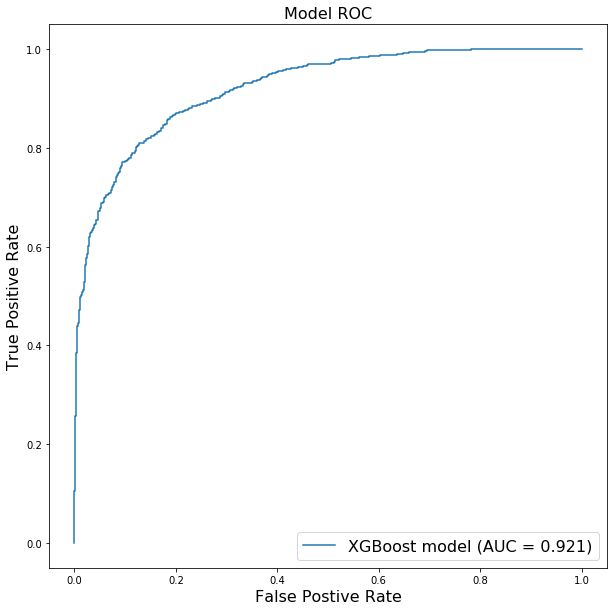

In [87]:
# Evaluate the result with the ROC curve and AUC:
fpr, tpr, _ = roc_curve(y_t3, y_score3)

# Compute the AUC score from the FP and TP rates
auc_score = auc(fpr,tpr)

# Plot the ROC curve for these results:
fig1 = plt.figure(figsize = [10,10])
plt.title('Model ROC', size = 16)
plt.plot(fpr, tpr, label=f'XGBoost model (AUC = {auc_score:5.3f})')
plt.legend(fontsize=16)
plt.xlabel('False Postive Rate', size=16)
plt.ylabel('True Positive Rate', size=16)